In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/bengkel.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      100 non-null    int64
 1   servis  100 non-null    int64
 2   harga   100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [ ]:
df

,id,servis,harga
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


# Fuzzifikasi

In [ ]:
#fungsi keanggotaan servis
batas_kualitas1 = 20
batas_kualitas2 = 47
batas_kualitas3 = 75
batas_kualitas4 = 87
batas_kualitas5 = 100

def buruk(x):
  if x <= batas_kualitas1:
    return 1
  elif x > batas_kualitas1 and x <= batas_kualitas2:
    return 1 - 2 * ((x - batas_kualitas1) / (batas_kualitas3 - batas_kualitas1)) ** 2
  elif x > batas_kualitas2 and x < batas_kualitas3:
    return 2 * ((batas_kualitas3 - x) / (batas_kualitas3 - batas_kualitas1)) ** 2
  else :
    return 0

def sedang(x) :
  if x <= batas_kualitas1:
    return 0
  elif x > batas_kualitas1 and x <= batas_kualitas2:
    return 2 * ((x - batas_kualitas1) / (batas_kualitas3 - batas_kualitas1)) ** 2
  elif x > batas_kualitas2 and x <= batas_kualitas3:
    return 1 - 2 * ((batas_kualitas3 - x) / (batas_kualitas3 - batas_kualitas1)) ** 2
  elif x > batas_kualitas3 and x <= batas_kualitas4:
    return 1 - 2 * ((x - batas_kualitas3) / (batas_kualitas5 - batas_kualitas3)) ** 2
  elif x > batas_kualitas4 and x < batas_kualitas5:
    return 2 * ((batas_kualitas5 - x) / (batas_kualitas5 - batas_kualitas3)) ** 2
  else :
    return 0

def baik(x) :
  if x <= batas_kualitas3:
    return 0
  elif x > batas_kualitas3 and x <= batas_kualitas4:
    return 2 * ((x - batas_kualitas3) / (batas_kualitas5 - batas_kualitas3)) ** 2
  elif x > batas_kualitas4 and x < batas_kualitas5:
    return 1 - 2 * ((batas_kualitas5 - x) / (batas_kualitas5 - batas_kualitas3)) ** 2
  else :
    return 1

df['buruk'] = df['servis'].apply(buruk)
df['sedang'] = df['servis'].apply(sedang)
df['baik'] = df['servis'].apply(baik)


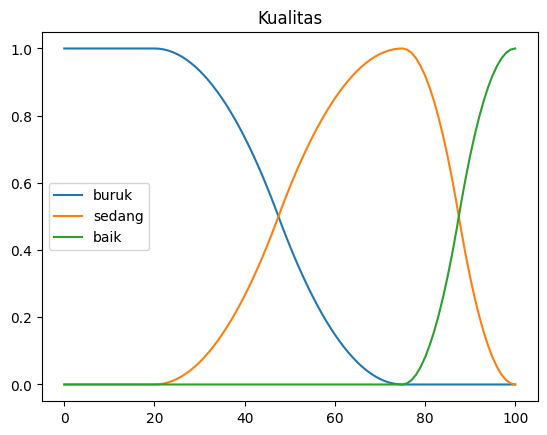

In [ ]:
#Grafik dari fungsi keanggotaan servis
servis = pd.DataFrame()
servis['value'] = range(0, 101)


servis['buruk'] = servis['value'].apply(buruk)
servis['sedang'] = servis['value'].apply(sedang)
servis['baik'] = servis['value'].apply(baik)

plt.plot(servis['value'], servis['buruk'], label='buruk')
plt.plot(servis['value'], servis['sedang'], label='sedang')
plt.plot(servis['value'], servis['baik'], label='baik')

plt.title('Kualitas')
plt.legend()
plt.show()

In [ ]:
df

,id,servis,harga,buruk,sedang,baik
0,1,58,7,0.191074,0.808926,0.0000
1,2,54,1,0.291570,0.708430,0.0000
2,3,98,2,0.000000,0.012800,0.9872
3,4,52,4,0.349752,0.650248,0.0000
4,5,11,4,1.000000,0.000000,0.0000
...,...,...,...,...,...,...
95,96,30,1,0.933884,0.066116,0.0000
96,97,25,3,0.983471,0.016529,0.0000
97,98,27,10,0.967603,0.032397,0.0000
98,99,8,6,1.000000,0.000000,0.0000


In [ ]:
#fungsi keanggotaan harga
batas_harga1 = 0
batas_harga2 = 4
batas_harga3 = 4
batas_harga4 = 7

def murah(x):
  if x <= batas_harga1:
    return 1
  elif x > batas_harga1 and x < batas_harga2 :
    return(batas_harga2 - x) / (batas_harga2 - batas_harga1)
  else :
    return 0

def terjangkau(x):
  if x <= batas_harga1 or x >= batas_harga4 :
    return 0
  elif x > batas_harga1 and x <= batas_harga2 :
    return (x-batas_harga1)/(batas_harga2 - batas_harga1)
  elif x > batas_harga2 and x <= batas_harga3 :
    return 1
  elif x > batas_harga3  and x < batas_harga4 :
    return (batas_harga4 - x) / (batas_harga4 - batas_harga3)

def mahal(x) :
  if x < batas_harga3 :
    return 0
  elif x >= batas_harga3 and x < batas_harga4 :
    return (x - batas_harga3) / (batas_harga4 - batas_harga3)
  else :
    return 1

df['murah'] = df['harga'].apply(murah)
df['terjangkau'] = df['harga'].apply(terjangkau)
df['mahal'] = df['harga'].apply(mahal)

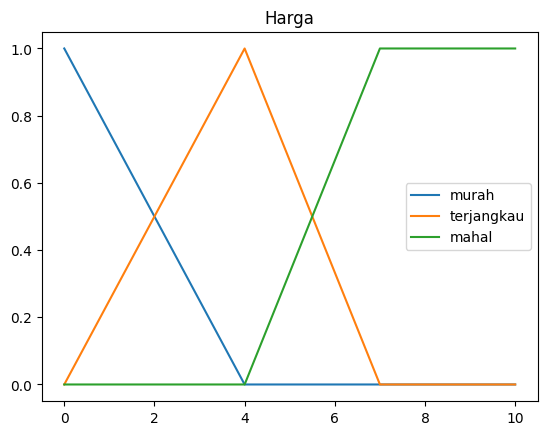

In [ ]:
harga = pd.DataFrame()
harga['value'] = range(0, 11)

harga['murah'] = harga['value'].apply(murah)
harga['terjangkau'] = harga['value'].apply(terjangkau)
harga['mahal'] = harga['value'].apply(mahal)

plt.plot(harga['value'], harga['murah'], label='murah')
plt.plot(harga['value'], harga['terjangkau'], label='terjangkau')
plt.plot(harga['value'], harga['mahal'], label='mahal')

plt.title('Harga')
plt.legend()
plt.show()

In [ ]:
df

,id,servis,harga,buruk,sedang,baik,murah,terjangkau,mahal
0,1,58,7,0.191074,0.808926,0.0000,0.00,0.000000,1.000000
1,2,54,1,0.291570,0.708430,0.0000,0.75,0.250000,0.000000
2,3,98,2,0.000000,0.012800,0.9872,0.50,0.500000,0.000000
3,4,52,4,0.349752,0.650248,0.0000,0.00,1.000000,0.000000
4,5,11,4,1.000000,0.000000,0.0000,0.00,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...
95,96,30,1,0.933884,0.066116,0.0000,0.75,0.250000,0.000000
96,97,25,3,0.983471,0.016529,0.0000,0.25,0.750000,0.000000
97,98,27,10,0.967603,0.032397,0.0000,0.00,0.000000,1.000000
98,99,8,6,1.000000,0.000000,0.0000,0.00,0.333333,0.666667


#Inferensi

In [ ]:
# aturan Inferensi
# 1. if buruk and mahal then tidak puas
# 2. if buruk and terjangkau then kurang puas
# 3. if sedang and mahal then kurang puas
# 4. if buruk and murah then biasa saja
# 5. if sedang and terjangkau then biasa saja
# 6. if baik and mahal then biasa saja
# 7. if sedang and murah then cukup puas
# 8. if baik and terjangkau then cukup puas
# 9. if baik and murah then puas

tabel = pd.DataFrame()
tabel['harga'] = ('murah', 'terjangkau', 'mahal')
tabel['buruk'] = ('biasa saja', 'kurang puas', 'tidak puas')
tabel['sedang'] = ('cukup puas', 'biasa saja', 'kurang puas')
tabel['baik'] = ('puas', 'cukup puas', 'biasa saja')
tabel

,harga,buruk,sedang,baik
0,murah,biasa saja,cukup puas,puas
1,terjangkau,kurang puas,biasa saja,cukup puas
2,mahal,tidak puas,kurang puas,biasa saja


In [ ]:
batas_nk1 = 20
batas_nk2 = 25
batas_nk3 = 25
batas_nk4 = 35
batas_nk5 = 45
batas_nk6 = 60
batas_nk7 = 65
batas_nk8 = 75

def tidak_puas(x):
  if x <= batas_nk1:
    return 1
  elif x > batas_nk1 and x < batas_nk2 :
    return(batas_nk2 - x) / (batas_nk2 - batas_nk1)
  else :
    return 0

def kurang_puas(x):
  if x <= batas_nk1 or x >= batas_nk4 :
    return 0
  elif x > batas_nk1 and x <= batas_nk2 :
    return (x-batas_nk1)/(batas_nk2 - batas_nk1)
  elif x > batas_nk2 and x <= batas_nk3 :
    return 1
  elif x > batas_nk3  and x < batas_nk4 :
    return (batas_nk4 - x) / (batas_nk4 - batas_nk3)

def biasa_saja(x):
  if x <= batas_nk3 or x >= batas_nk6 :
    return 0
  elif x > batas_nk3 and x <= batas_nk4 :
    return (x-batas_nk3)/(batas_nk4 - batas_nk3)
  elif x > batas_nk4 and x <= batas_nk5 :
    return 1
  elif x > batas_nk5  and x < batas_nk6 :
    return (batas_nk6 - x) / (batas_nk6 - batas_nk5)

def cukup_puas(x):
  if x <= batas_nk5 or x >= batas_nk8 :
    return 0
  elif x > batas_nk5 and x <= batas_nk6 :
    return (x-batas_nk5)/(batas_nk6 - batas_nk5)
  elif x > batas_nk6 and x <= batas_nk7 :
    return 1
  elif x > batas_nk7  and x < batas_nk8 :
    return (batas_nk8 - x) / (batas_nk8 - batas_nk7)

def puas(x) :
  if x < batas_nk7 :
    return 0
  elif x >= batas_nk7 and x < batas_nk8 :
    return (x - batas_nk7) / (batas_nk8 - batas_nk7)
  else :
    return 1

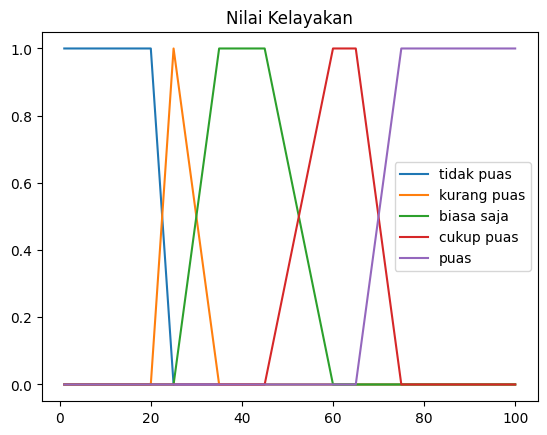

In [ ]:
nk = pd.DataFrame()
nk['value'] = range(1, 101)

nk['tidak puas'] = nk['value'].apply(tidak_puas)
nk['kurang puas'] = nk['value'].apply(kurang_puas)
nk['biasa saja'] = nk['value'].apply(biasa_saja)
nk['cukup puas'] = nk['value'].apply(cukup_puas)
nk['puas'] = nk['value'].apply(puas)

plt.plot(nk['value'], nk['tidak puas'], label='tidak puas')
plt.plot(nk['value'], nk['kurang puas'], label='kurang puas')
plt.plot(nk['value'], nk['biasa saja'], label='biasa saja')
plt.plot(nk['value'], nk['cukup puas'], label='cukup puas')
plt.plot(nk['value'], nk['puas'], label='puas')

plt.title('Nilai Kelayakan')
plt.legend()
plt.show()

In [ ]:
nk

,value,tidak puas,kurang puas,biasa saja,cukup puas,puas
0,1,1.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0.0,0.0,0.0
2,3,1.0,0.0,0.0,0.0,0.0
3,4,1.0,0.0,0.0,0.0,0.0
4,5,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
95,96,0.0,0.0,0.0,0.0,1.0
96,97,0.0,0.0,0.0,0.0,1.0
97,98,0.0,0.0,0.0,0.0,1.0
98,99,0.0,0.0,0.0,0.0,1.0


In [ ]:
df['tidak puas'] = df[['buruk', 'mahal']].min(axis = 1)
df['kurang puas1'] = df[['buruk', 'terjangkau']].min(axis = 1)
df['kurang puas2'] = df[['sedang', 'mahal']].min(axis = 1)
df['kurang puas'] = df[['kurang puas1', 'kurang puas2']].max(axis = 1)

In [ ]:
df['biasa saja1'] = df[['buruk', 'murah']].min(axis = 1)
df['biasa saja2'] = df[['sedang', 'terjangkau']].min(axis = 1)
df['biasa saja3'] = df[['baik', 'mahal']].min(axis = 1)
df['biasa saja'] = df[['biasa saja1', 'biasa saja2', 'biasa saja3']].max(axis = 1)

In [ ]:
df['cukup puas1'] = df[['sedang', 'murah']].min(axis = 1)
df['cukup puas2'] = df[['baik', 'terjangkau']].min(axis = 1)
df['cukup puas'] = df[['cukup puas1', 'cukup puas2']].max(axis = 1)
df['puas'] = df[['baik', 'murah']].min(axis = 1)

In [ ]:
df = df.drop(columns = ['kurang puas1', 'kurang puas2', 'cukup puas1', 'cukup puas2', 'biasa saja1', 'biasa saja2', 'biasa saja3'])

In [ ]:
df

,id,servis,harga,buruk,sedang,baik,murah,terjangkau,mahal,tidak puas,kurang puas,biasa saja,cukup puas,puas
0,1,58,7,0.191074,0.808926,0.0000,0.00,0.000000,1.000000,0.191074,0.808926,0.000000,0.000000,0.0
1,2,54,1,0.291570,0.708430,0.0000,0.75,0.250000,0.000000,0.000000,0.250000,0.291570,0.708430,0.0
2,3,98,2,0.000000,0.012800,0.9872,0.50,0.500000,0.000000,0.000000,0.000000,0.012800,0.500000,0.5
3,4,52,4,0.349752,0.650248,0.0000,0.00,1.000000,0.000000,0.000000,0.349752,0.650248,0.000000,0.0
4,5,11,4,1.000000,0.000000,0.0000,0.00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,30,1,0.933884,0.066116,0.0000,0.75,0.250000,0.000000,0.000000,0.250000,0.750000,0.066116,0.0
96,97,25,3,0.983471,0.016529,0.0000,0.25,0.750000,0.000000,0.000000,0.750000,0.250000,0.016529,0.0
97,98,27,10,0.967603,0.032397,0.0000,0.00,0.000000,1.000000,0.967603,0.032397,0.000000,0.000000,0.0
98,99,8,6,1.000000,0.000000,0.0000,0.00,0.333333,0.666667,0.666667,0.333333,0.000000,0.000000,0.0


defuzy

In [ ]:
def rumus(d):
    try:
      i = 1
      v1 = 0.0
      v2 = 0.0
      v3 = 0.0
      v4 = 0.0
      v5 = 0.0
      vt = 0.0
      n1 = 0
      n2 = 0
      n3 = 0
      n4 = 0
      n5 = 0

      while i <= 100:
        v1 = np.minimum(nk.loc[nk['value'] == i, 'tidak puas'].values, d['tidak puas']) * i
        v2 = np.minimum(nk.loc[nk['value'] == i, 'kurang puas'].values, d['kurang puas']) * i
        v3 = np.minimum(nk.loc[nk['value'] == i, 'biasa saja'].values, d['biasa saja']) * i
        v4 = np.minimum(nk.loc[nk['value'] == i, 'cukup puas'].values, d['cukup puas']) * i
        v5 = np.minimum(nk.loc[nk['value'] == i, 'puas'].values, d['puas']) * i
        if max(v1,v2,v3,v4,v5) == v1:
          n1 += 1
          vt += v1
        elif max(v1,v2,v3,v4,v5) == v2:
          n2 += 1
          vt += v2
        elif max(v1,v2,v3,v4,v5) == v3:
          n3 += 1
          vt += v3
        elif max(v1,v2,v3,v4,v5) == v4:
          n4 += 1
          vt += v4
        elif max(v1,v2,v3,v4,v5) == v5:
          n5 += 1
          vt += v5
        i += 1

      return vt / (n1 * d['tidak puas'] + n2 * d['kurang puas'] + n3 * d['biasa saja'] + n4 * d['cukup puas'] + n5 * d['puas'])

    except KeyError as e:
      print(f"Error: {e} column not found in DataFrame. Check column names.")
      return None

df['score'] = df.apply(rumus, axis = 1)

In [ ]:
df['score'] = df['score'].astype(float)
df

,id,servis,harga,buruk,sedang,baik,murah,terjangkau,mahal,tidak puas,kurang puas,biasa saja,cukup puas,puas,score
0,1,58,7,0.191074,0.808926,0.0000,0.00,0.000000,1.000000,0.191074,0.808926,0.000000,0.000000,0.0,8.393481
1,2,54,1,0.291570,0.708430,0.0000,0.75,0.250000,0.000000,0.000000,0.250000,0.291570,0.708430,0.0,45.039026
2,3,98,2,0.000000,0.012800,0.9872,0.50,0.500000,0.000000,0.000000,0.000000,0.012800,0.500000,0.5,69.837921
3,4,52,4,0.349752,0.650248,0.0000,0.00,1.000000,0.000000,0.000000,0.349752,0.650248,0.000000,0.0,33.897885
4,5,11,4,1.000000,0.000000,0.0000,0.00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,14.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,30,1,0.933884,0.066116,0.0000,0.75,0.250000,0.000000,0.000000,0.250000,0.750000,0.066116,0.0,33.642654
96,97,25,3,0.983471,0.016529,0.0000,0.25,0.750000,0.000000,0.000000,0.750000,0.250000,0.016529,0.0,30.252546
97,98,27,10,0.967603,0.032397,0.0000,0.00,0.000000,1.000000,0.967603,0.032397,0.000000,0.000000,0.0,2.937408
98,99,8,6,1.000000,0.000000,0.0000,0.00,0.333333,0.666667,0.666667,0.333333,0.000000,0.000000,0.0,4.275132


In [ ]:
df = df.drop(columns = ['buruk', 'sedang', 'baik', 'murah', 'terjangkau', 'mahal', 'tidak puas', 'kurang puas', 'biasa saja', 'cukup puas', 'puas'])

In [ ]:
top5 = df.nlargest(5, 'score')
top5

,id,servis,harga,score
2,3,98,2,69.837921
90,91,98,3,55.690443
51,52,94,3,55.546580
91,92,83,3,46.422721
43,44,63,2,45.481553


In [ ]:
top5.to_excel("peringkat.xlsx", index=False)